Seed pixel value: 54


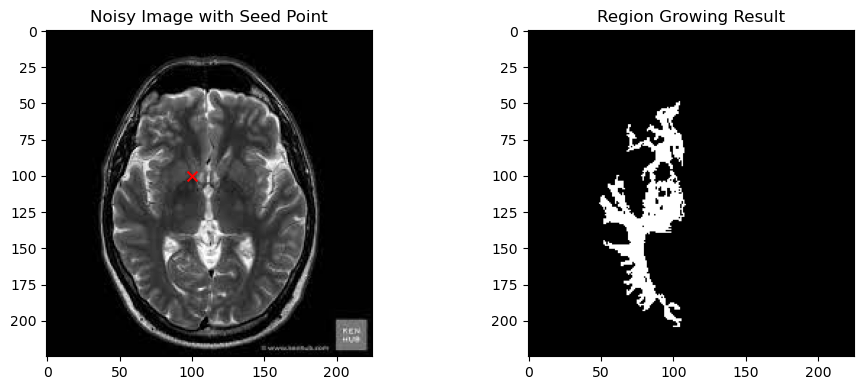

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque
import os

#Set path for saving output
RESULT_DIR = "../Result"
os.makedirs(RESULT_DIR, exist_ok=True)

#Load the grayscale brain MRI image
img = cv2.imread('../image/image.jpg', cv2.IMREAD_GRAYSCALE)

#Choose a seed point inside the brain (visually estimated or use ginput)
seed_point = (100, 100)  # row, column (Y, X) format
print("Seed pixel value:", img[seed_point])

#Region Growing Function
def region_growing(img, seed, threshold=15):
    rows, cols = img.shape
    segmented = np.zeros_like(img, dtype=np.uint8)
    visited = np.zeros_like(img, dtype=bool)
    directions = [(-1,0), (1,0), (0,-1), (0,1)]
    
    seed_val = img[seed]
    queue = deque([seed])
    visited[seed] = True

    while queue:
        r, c = queue.popleft()
        segmented[r, c] = 255

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and not visited[nr, nc]:
                if abs(int(img[nr, nc]) - int(seed_val)) <= threshold:
                    queue.append((nr, nc))
                    visited[nr, nc] = True
    return segmented

#Apply region growing
segmented = region_growing(img, seed_point, threshold=15)

#Save result
cv2.imwrite(f"{RESULT_DIR}/region_growing.png", segmented)

#Display results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.scatter(seed_point[1], seed_point[0], color='red', marker='x', s=50)
plt.title("Noisy Image with Seed Point")

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Region Growing Result")

plt.tight_layout()
plt.savefig(f"{RESULT_DIR}/region_growing_visual.png")
plt.show()
